# Meta Llama 3.1 405B Instruct with v2.17 prompt

This notebook outlines the steps undertook to generate a prediction using Meta Llama 3.1 405B Instruct with prompt from 2/17/25.

Given the model showed promising recall using the 2.13 prompt, I wanted to give the 2.17 prompt a try.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import llama_instructions_v217
MODEL_ID = "meta.llama3-1-405b-instruct-v1:0"
SYSTEM_PROMPT = llama_instructions_v217

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 3
INFO:root:Completed: 4
INFO:root:Completed: 2
INFO:root:Completed: 1
INFO:root:Completed: 0
INFO:root:Completed: 5
INFO:root:Completed: 7
INFO:root:Completed: 6
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 10
INFO:root:Completed: 13
INFO:root:Completed: 12
INFO:root:Completed: 11
INFO:root:Completed: 14
INFO:root:Completed: 15
INFO:root:Completed: 17
INFO:root:Completed: 18
INFO:root:Completed: 16
INFO:root:Completed: 19
INFO:root:Completed: 20
INFO:root:Completed: 22
INFO:root:Completed: 21
INFO:root:Completed: 23
INFO:root:Completed: 24
INFO:root:Completed: 25
INFO:root:Completed: 26
INFO:root:Completed: 27
INFO:root:Completed: 28
INFO:root:Completed: 30


CPU times: user 1min 11s, sys: 4.88 s, total: 1min 16s
Wall time: 30min 57s


[{'0004.91306_cites_88240.txt': {'model': 'meta.llama3-1-405b-instruct-v1:0',
   'input_tokens': 2194,
   'output_tokens': 88,
   'prediction': 'no',
   'confidence': 0.987,
   'rationale': 'The passage discusses the Target Case, Texas v. Hardenberg, 10 Wall. 68, but does not indicate that it has been overruled. Instead, it mentions that the grounds of the former decision were reconsidered and declared to be satisfactory, suggesting that the Target Case remains valid.',
   'raw_results': '\n\n{\n  "overruled": "no",\n  "confidence": 0.987,\n  "rationale": "The passage discusses the Target Case, Texas v. Hardenberg, 10 Wall. 68, but does not indicate that it has been overruled. Instead, it mentions that the grounds of the former decision were reconsidered and declared to be satisfactory, suggesting that the Target Case remains valid."\n}'}},
 {'0005.91306_cites_88693.txt': {'model': 'meta.llama3-1-405b-instruct-v1:0',
   'input_tokens': 2195,
   'output_tokens': 82,
   'prediction': 'no

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0004.91306_cites_88240.txt,meta.llama3-1-405b-instruct-v1:0,2194,88,no,0.987,"The passage discusses the Target Case, Texas v...","\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."
1,0005.91306_cites_88693.txt,meta.llama3-1-405b-instruct-v1:0,2195,82,no,0.987,The passage discusses and analyzes the Target ...,"\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."
2,0003.91306_cites_87633.txt,meta.llama3-1-405b-instruct-v1:0,2222,93,no,0.950,The passage discusses and reaffirms the rules ...,"\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."
3,0002.91306_cites_88994.txt,meta.llama3-1-405b-instruct-v1:0,2683,110,no,0.950,The passage discusses and analyzes the Target ...,"\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."
4,0001.91306_cites_88061.txt,meta.llama3-1-405b-instruct-v1:0,2971,111,yes,0.950,The passage explicitly states that the positio...,"\n\n{\n ""overruled"": ""yes"",\n ""confidence"": ..."


## Save the raw prediction results

In [5]:
prediction_df.to_csv("predictions/3.llama/1.llama31_405B_v217_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [6]:
prediction_df["prediction"].isna().sum()

6

In [7]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/3.llama/1.llama31_405B_v217_prompt.csv")

In [8]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [9]:
assert len(df) == len(prediction_df)

In [10]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,meta.llama3-1-405b-instruct-v1:0,2971,111,yes,0.950,The passage explicitly states that the positio...,"\n\n{\n ""overruled"": ""yes"",\n ""confidence"": ..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,meta.llama3-1-405b-instruct-v1:0,2683,110,no,0.950,The passage discusses and analyzes the Target ...,"\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,meta.llama3-1-405b-instruct-v1:0,2222,93,no,0.950,The passage discusses and reaffirms the rules ...,"\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,meta.llama3-1-405b-instruct-v1:0,2194,88,no,0.987,"The passage discusses the Target Case, Texas v...","\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,meta.llama3-1-405b-instruct-v1:0,2195,82,no,0.987,The passage discusses and analyzes the Target ...,"\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."


# Run evaluation

In [11]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [12]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["prediction"].value_counts()

prediction
no     872
yes    212
Name: count, dtype: int64

In [14]:
eval_df["input_tokens"].sum()

3582424

In [15]:
eval_df["output_tokens"].sum()

115951

In [16]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [17]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.98      0.91      0.94       935
         Yes       0.60      0.86      0.71       149

    accuracy                           0.90      1084
   macro avg       0.79      0.88      0.83      1084
weighted avg       0.92      0.90      0.91      1084



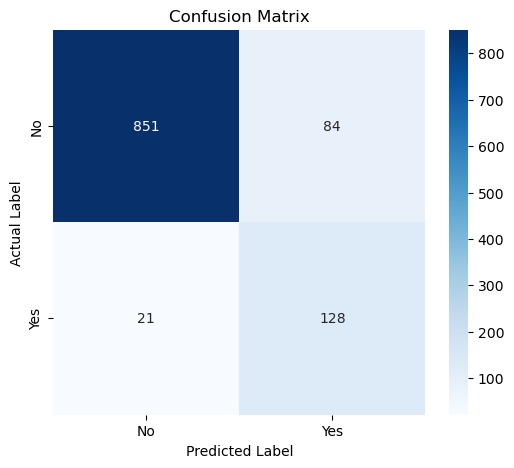

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.90
Precision: 0.60
Recall: 0.86
F-score: 0.71
Specificity: 0.91
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 128
True negatives: 851
False positives: 84
False negatives: 21


In [20]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

84

In [21]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

21

# Save the evaluation df

In [22]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,meta.llama3-1-405b-instruct-v1:0,2971,111,yes,0.950,The passage explicitly states that the positio...,"\n\n{\n ""overruled"": ""yes"",\n ""confidence"": ..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,meta.llama3-1-405b-instruct-v1:0,2683,110,no,0.950,The passage discusses and analyzes the Target ...,"\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,meta.llama3-1-405b-instruct-v1:0,2222,93,no,0.950,The passage discusses and reaffirms the rules ...,"\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,meta.llama3-1-405b-instruct-v1:0,2194,88,no,0.987,"The passage discusses the Target Case, Texas v...","\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,meta.llama3-1-405b-instruct-v1:0,2195,82,no,0.987,The passage discusses and analyzes the Target ...,"\n\n{\n ""overruled"": ""no"",\n ""confidence"": 0..."


In [23]:
eval_df.to_csv("predictions/3.llama/1.llama31_405B_v217_prompt_eval.csv", index=False)